In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [2]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [3]:

m.shape

(2553, 14)

In [4]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

In [6]:
X_train.shape

(2042, 10)

In [7]:
X_test.shape

(511, 10)

In [8]:
X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1815,0.504,9,-9.874,1,0.0731,0.1860,0.000221,0.340,0.252,203506
354,0.787,3,-5.560,0,0.2250,0.3250,0.000000,0.126,0.564,211582
895,0.478,1,-9.142,1,0.2310,0.0881,0.000002,0.357,0.774,244866
244,0.512,4,-9.839,0,0.0348,0.2400,0.018100,0.587,0.759,197306
2140,0.459,6,-4.126,1,0.0275,0.1300,0.000002,0.113,0.281,261800


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#predictors

y_pred = model.predict(X_test)
y_pred[1:10]

array([0.6310672 , 0.73114102, 0.61546568, 0.66388828, 0.60620502,
       0.64656935, 0.73402858, 0.3888626 , 0.5681265 ])

In [11]:
#testing R2
model.score(X_test, y_test)

0.4251947906139568

In [13]:
#training R2
model.score(X_train, y_train)

0.3433876663803068

In [16]:
#make pred df for ggplot
true_vs_pred = pd.DataFrame({"predict": y_pred, "true": y_test})
true_vs_pred.head()

,predict,true
2167,0.704827,0.643
259,0.631067,0.640
1695,0.731141,0.684
2193,0.615466,0.403
37,0.663888,0.661


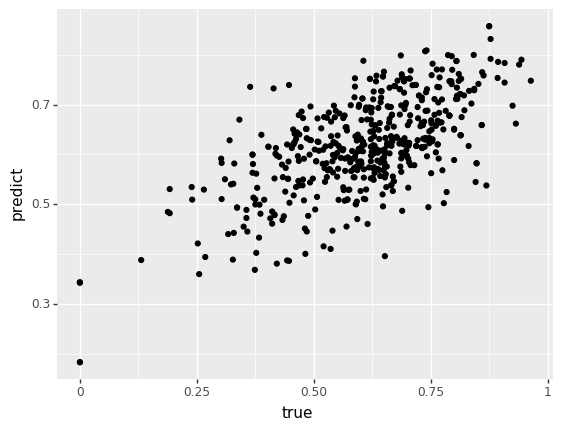

<ggplot: (276930425)>

In [19]:
(ggplot(true_vs_pred, aes("true", "predict")) + geom_point())

# K Fold

In [20]:
kf = KFold(n_splits = 10)

In [21]:
x = m[predictors]
y = m["danceability"]

model = LinearRegression()

In [23]:
mse = cross_val_score(model, x, y, cv = kf, scoring = "neg_mean_squared_error")

In [24]:
mse

array([-0.02093031, -0.02398416, -0.01761189, -0.01403148, -0.01796454,
       -0.0212833 , -0.02109307, -0.00763517, -0.01173777, -0.01199926])

In [25]:
np.mean(mse)

-0.016827095268677917

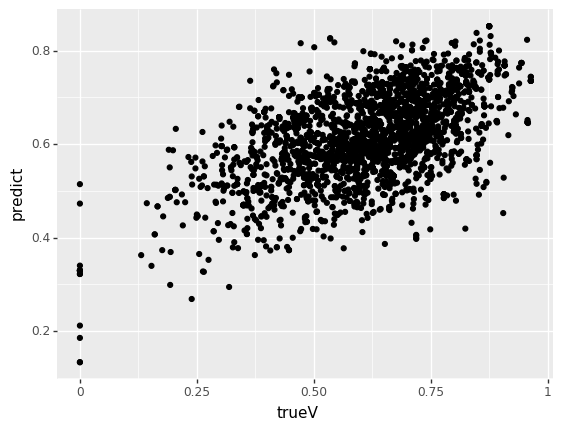

<ggplot: (295060057)>

In [27]:
y_pred = cross_val_predict(model, x,y, cv = kf)
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

# Leave One Out

In [28]:
r2_score(y, y_pred)

0.31211680549073595

In [29]:
loo = LeaveOneOut()

In [31]:
mse = cross_val_score(model, x,y, cv = loo, scoring = "neg_mean_squared_error")

In [32]:
np.mean(mse)

-0.015773261852274713

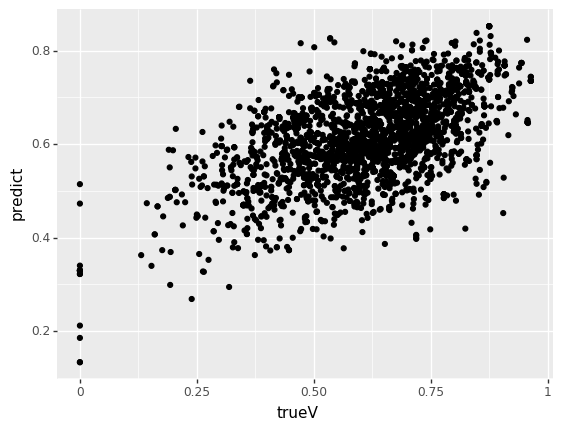

<ggplot: (295156845)>

In [33]:
y_pred = cross_val_predict(model, x,y, cv = kf)
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())